In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import yfinance as yf
from datetime import datetime

In [2]:
def download_sp500_data(start_date='1928-01-01', end_date=datetime.today().strftime('%Y-%m-%d')):
    sp500 = yf.download('^GSPC', start=start_date, end=end_date)
    sp500.sort_index(inplace=True)
    return sp500

def filter_data_by_month(data, months):
    data['Month'] = data.index.month
    return data[data['Month'].isin(months)]

def normalize_data(data):
    data['Year'] = data.index.year
    data['DayOfYear'] = data.index.dayofyear
    data['NewIndex'] = data['DayOfYear'] - min(data['DayOfYear'][data['Month'] == 6])
    data['Normalized'] = data.groupby('Year')['Close'].transform(lambda x: x / x.iloc[0] * 100)
    return data

def reindex_data(data, start_date="2000-06-01", freq='B'):
    date_range = pd.date_range(start=start_date, periods=len(data), freq=freq)
    data.set_index(date_range, inplace=True)
    return data

In [3]:
def plot_data(composite_data, current_year_data, annotation_date="2000-06-30"):
    fig, ax = plt.subplots(figsize=(16, 8))
    ax.set_facecolor('black')
    fig.patch.set_facecolor('black')

    ax.tick_params(colors='white')
    ax.xaxis.label.set_color('white')
    ax.yaxis.label.set_color('white')

    ax.plot(composite_data.index, composite_data['Normalized'], label='Composite SP500', color='white')
    ax.plot(current_year_data.index, current_year_data['Normalized'], label=f'{current_year_data.Year[0]} SP500', color='orange')

    ax.axvline(pd.to_datetime(annotation_date), color='red', linestyle='--')

    annotation = ax.annotate('Today', xy=(pd.to_datetime(annotation_date), 100), xytext=(0.88, 0.2), textcoords='axes fraction',
                             arrowprops=dict(facecolor='salmon', edgecolor='salmon', shrink=0.05, width=0.5, headwidth=7), color='salmon')
    annotation.set_bbox(dict(facecolor='black', edgecolor='white', boxstyle='round,pad=0.5'))

    max_value = max(composite_data['Normalized'].max(), current_year_data['Normalized'].max())
    min_value = min(composite_data['Normalized'].min(), current_year_data['Normalized'].min())
    ax.set_ylim([min_value - 1, max_value + 1])

    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
    
    plt.legend(facecolor='black', edgecolor='white', labelcolor='white')
    plt.show()

[*********************100%***********************]  1 of 1 completed


C:\Users\User\AppData\Local\Temp\ipykernel_28896\2076723804.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Year'] = data.index.year
C:\Users\User\AppData\Local\Temp\ipykernel_28896\2076723804.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['DayOfYear'] = data.index.dayofyear
C:\Users\User\AppData\Local\Temp\ipykernel_28896\2076723804.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

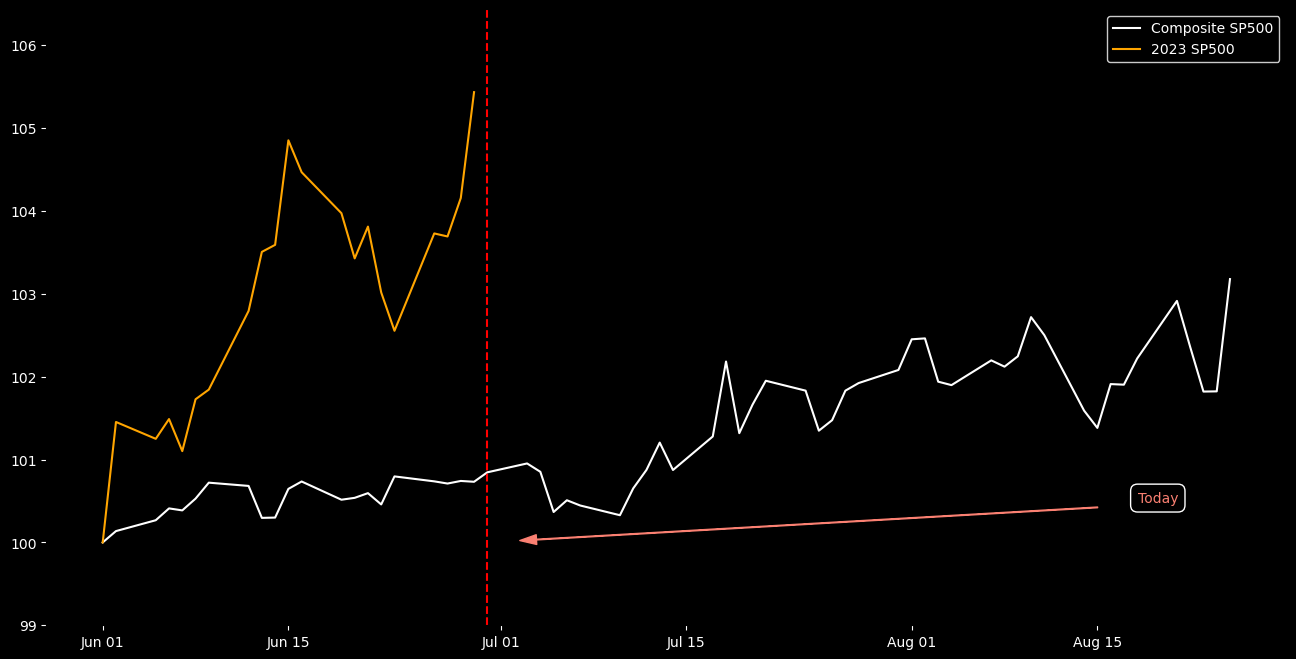

In [4]:
sp500 = download_sp500_data()
sp500 = filter_data_by_month(sp500, [6, 7])
sp500 = normalize_data(sp500)

composite_sp500 = sp500.groupby('NewIndex').mean()
composite_sp500 = reindex_data(composite_sp500)

current_year_value = datetime.today().year 
current_year = sp500[sp500['Year'] == current_year_value]
current_year = reindex_data(current_year, freq='B')
current_year = current_year.asfreq('B').fillna(method='ffill')

plot_data(composite_sp500, current_year, "2000-06-30")